# ラザフォード散乱の角度分布
ラザフォード散乱の角度分布をグラフ化する。  
具体的に$E_{\alpha} = 1.4, 4.1$ MeV、ターゲットがAlの場合のグラフを作成してみる。 
ラザフォード散乱の式は次の通り
$$
\frac{d\sigma}{d\Omega} = \left(\frac{zZe^2}{4E}\right)^2\frac{1}{\sin^4(\theta/2)}
$$


角度と２つエネルギーについての断面積を保持するためのベクターを用意する

In [1]:
std::vector<double> theta = {};
std::vector<double> cs  = {};
std::vector<double> cs2  = {};

エネルギー、粒子の電荷などを定義しておく。

In [2]:
const double rad2deg = 180.0/M_PI; // rad -> deg. 変換
double E = 4.1; //エネルギー
double E2 = 1.5; //エネルギー
double z = 2.0; //アルファ粒子の電荷
double Z = 13.0; //Alの電荷
const double hbarc = 197.3; // プランク定数x高速(MeV fm)
const double alpha = 1.0/137.0; // 微細構造定数
const double e2 = hbarc*alpha; // 素電荷の２乗

ループを回してそれぞれの角度に対する断面積を計算していく

In [3]:
for(int i =1 ; i < 1000;++i){
    double q = static_cast<double>(i)*(0.5*M_PI)/1000; // 90度まで1000点
    double c = TMath::Power((z*Z*e2/4.0/E),2.0)*1.0/TMath::Power(TMath::Sin(0.5*q),4); //ラザフォード散乱の式
    double c2 = TMath::Power((z*Z*e2/4.0/E2),2.0)*1.0/TMath::Power(TMath::Sin(0.5*q),4); //ラザフォード散乱の式
    theta.push_back(q*rad2deg); // 角度をdeg. unitにして詰める
    cs.push_back(c); //断面積を詰める
    cs2.push_back(c2); //断面積を詰める
}

グラフの作成

In [4]:
auto *gr = new TGraph(theta.size(), &theta[0], &cs[0]);
auto *gr2 = new TGraph(theta.size(), &theta[0], &cs2[0]);


空のヒストグラムを作っておいてそこに２つのグラフを重ねていく

In [6]:
auto h2 = new TH2D("h2",";#theta [deg]; d#sigma/d#Omega [fm^{2}]",100,0,90,100,10.0,1.0e8);
auto can = new TCanvas("can","",600,600);
can->SetLogy();
h2->Draw();
gr->SetLineColor(kMagenta);
gr->SetLineWidth(2);
gr->Draw("L");
gr2->Draw("L");

凡例を加えていく

In [7]:
auto leg = new TLegend(0.6, 0.68, 0.9, 0.85, "", "NDC");
leg->AddEntry(gr, "E = 4.1 MeV","l");
leg->AddEntry(gr2, "E = 1.5 MeV","l");
leg->SetBorderSize(0);
leg->Draw();

描画

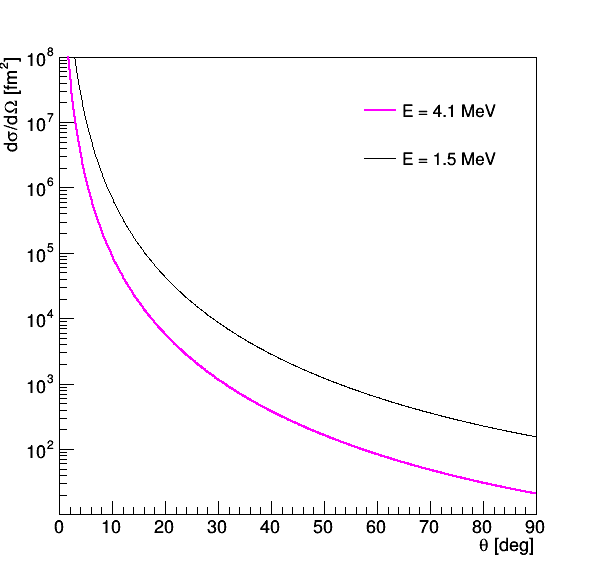

In [8]:
gStyle->SetOptStat(0);
can->Draw();